<a href="https://colab.research.google.com/github/Mdasiftalukdar/Medical-Image-Classification-Employing-DCGAN-and-CNN-Transfer-Learning-Techniques/blob/main/CNN_After_DCGAN_on_X_ray_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf

# folder
import os
import glob
import pickle

import cv2
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SeparableConv2D, MaxPooling2D, Lambda
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, add, concatenate
from tensorflow.keras.layers import LeakyReLU, Activation, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

# image
from PIL import Image

# visu
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
categories = ["NORMAL", "PNEUMONIA"]
datasets = ["train", "test", "val"]

In [ ]:
image_width=128
image_height=128

In [ ]:
%%time
data = []
target = []

for set_ in datasets:
    for cat in categories:
        print(set_ + '/' + cat + '/')
        filelist = glob.glob('/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/chest_xray/' + set_ + '/' + cat + '/*.jpeg')
        target.extend([cat for _ in filelist])
        data.extend([np.array(Image.open(fname).convert('L').resize((image_height, image_width))) for fname in filelist])


train/NORMAL/
train/PNEUMONIA/
test/NORMAL/
test/PNEUMONIA/
val/NORMAL/
val/PNEUMONIA/
CPU times: user 1min 36s, sys: 3.28 s, total: 1min 39s
Wall time: 16min 38s


In [ ]:
print(np.array(data).shape)
print(np.array(target).shape)

(5856, 128, 128)
(5856,)


In [ ]:
pd.concat([pd.DataFrame(pd.DataFrame({"Target" : target}).value_counts()).rename(columns={0:"count"}),
           pd.DataFrame(pd.DataFrame(target).value_counts()*100/len(target)).applymap(round).rename(columns={0:"%"}),
           pd.DataFrame(pd.DataFrame(target).value_counts()*7/100).applymap(round).rename(columns={0:"7% data"})
           ], axis=1)

,count,%,7% data
Target,,,
PNEUMONIA,4273,73,299
NORMAL,1583,27,111


In [ ]:
#fake normal image added

filelist = glob.glob('/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/selected normal fake images/*.png')
data.extend([np.array(Image.open(fname).convert('L').resize((image_width,image_height))) for fname in filelist])
target.extend(['NORMAL' for _ in filelist])
print(np.array(data).shape)
print(np.array(target).shape)

(5966, 128, 128)
(5966,)


In [ ]:
#fake pneumonia image added

filelist = glob.glob('/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/selected pneumonia fake images/*.png')
data.extend([np.array(Image.open(fname).convert('L').resize((image_width, image_height))) for fname in filelist])
target.extend(['PNEUMONIA' for _ in filelist])
print(np.array(data).shape)
print(np.array(target).shape)

(6266, 128, 128)
(6266,)


In [ ]:
pd.concat([pd.DataFrame(pd.DataFrame({"Target" : target}).value_counts()).rename(columns={0:"count"}),
           pd.DataFrame(pd.DataFrame(target).value_counts()*100/len(target)).applymap(round).rename(columns={0:"%"}),
           ], axis=1)

,count,%
Target,,
PNEUMONIA,4573,73
NORMAL,1693,27


In [ ]:
data_array = np.stack(data, axis=0)

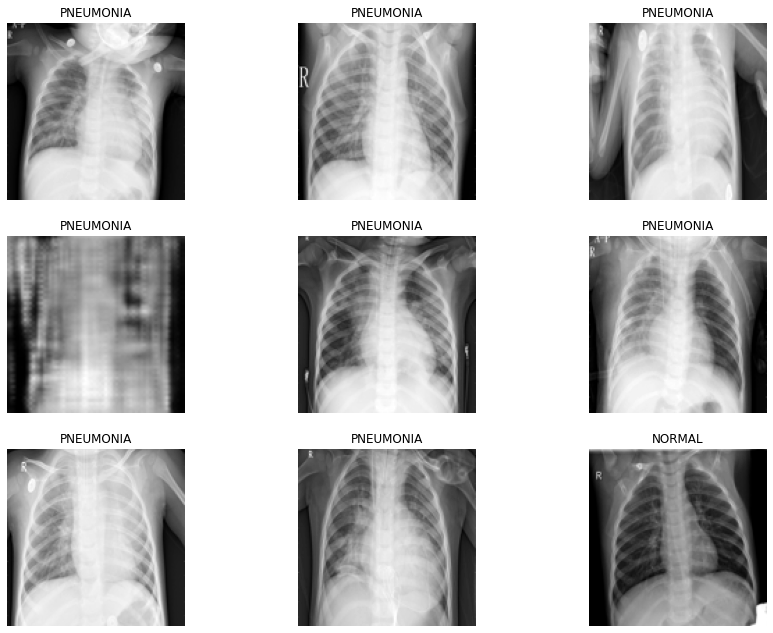

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, data_array.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(target[num_image])
        ax.imshow(data_array[num_image]);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_array, np.array(target), random_state=43, test_size=0.2, stratify=target)

In [ ]:
print(X_train.shape)
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_train.sav'
pickle.dump(X_train, open(filename, 'wb'))

print(X_test.shape)
filename2 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_test.sav'
pickle.dump(X_test, open(filename2, 'wb'))

print(y_train.shape)
filename3 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/y_train.sav'
pickle.dump(y_train, open(filename3, 'wb'))

print(y_test.shape)

filename4 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/y_test.sav'
pickle.dump(y_test, open(filename4, 'wb'))

(5012, 128, 128)
(1254, 128, 128)
(5012,)
(1254,)


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_train.sav'
X_train = pickle.load(open(filename, 'rb'))
print(X_train.shape)

filename2 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_test.sav'
X_test = pickle.load(open(filename2, 'rb'))
print(X_test.shape)

filename3 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/y_train.sav'
y_train = pickle.load(open(filename3, 'rb'))
print(y_train.shape)

filename4 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/y_test.sav'
y_test = pickle.load(open(filename4, 'rb'))
print(y_test.shape)

(5012, 128, 128)
(1254, 128, 128)
(5012,)
(1254,)


In [ ]:
pd.DataFrame(y_train).value_counts()/len(y_train)

PNEUMONIA    0.729848
NORMAL       0.270152
dtype: float64

In [ ]:
pd.DataFrame(y_test).value_counts()/len(y_test)

PNEUMONIA    0.729665
NORMAL       0.270335
dtype: float64

In [ ]:
print(X_train.max())
print(X_train.min())

255
0


In [ ]:
X_test_norm = np.round((X_test/255), 3).copy()
X_train_norm = np.round((X_train/255), 3).copy()

In [ ]:
print(X_train_norm.max())
print(X_train_norm.min())

1.0
0.0


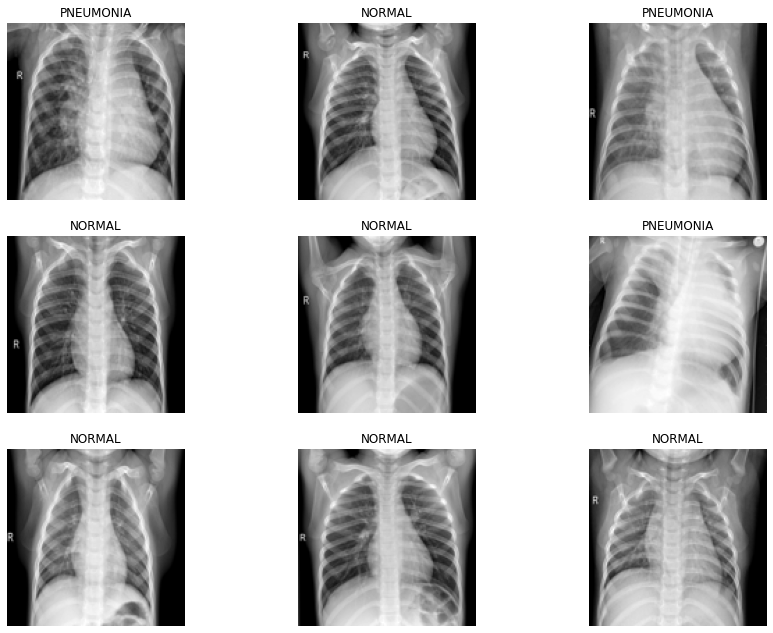

In [ ]:
#images after normalization
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X_train_norm.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(y_train[num_image])
        ax.imshow(X_train_norm[num_image]);

In [ ]:
display(np.array(y_train).shape)
display(np.unique(y_train))
display(np.array(y_test).shape)
display(np.unique(y_test))
print(y_test)

(5012,)

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

(1254,)

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

['PNEUMONIA' 'PNEUMONIA' 'NORMAL' ... 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA']


In [ ]:
encoder = LabelEncoder().fit(y_train) #normal = 0, pneumonia = 1
y_train_cat = encoder.transform(y_train)
y_test_cat = encoder.transform(y_test)

In [ ]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)
display(np.unique(y_test_cat))
print(y_test_cat)

(5012, 128, 128)
(1254, 128, 128)
(5012,)
(1254,)


array([0, 1])

[1 1 0 ... 1 1 1]


In [ ]:
#for coustom cnn with 1 dimension
X_train_cnn = X_train_norm.reshape(-1, image_width, image_height, 1)
X_test_cnn = X_test_norm.reshape(-1, image_width, image_height, 1)
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(5012, 128, 128, 1)
(1254, 128, 128, 1)


In [ ]:
#for transfer learning models
X_train_tl = np.repeat(X_train_norm[..., np.newaxis], 3, -1)
X_test_tl = np.repeat(X_test_norm[..., np.newaxis], 3, -1)
print(X_train_tl.shape)
print(X_test_tl.shape)

(5012, 128, 128, 3)
(1254, 128, 128, 3)


In [ ]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(5012,)
(1254,)


# **Custom CNN**

In [ ]:
def initialize_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(image_height, image_width, 1), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 128)     

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics="accuracy")
    return model

In [ ]:
%%time
model = initialize_model()
model = compile_model(model)
es = EarlyStopping(patience=15, monitor='val_accuracy', restore_best_weights=True)

cnn_gan = model.fit(X_train_cnn, y_train_cat,
                    batch_size=8,
                    epochs=20,
                    validation_split=0.3,
                    callbacks=[es])

Epoch 1/20
439/439 [==============================] - 11s 22ms/step - loss: 0.4017 - accuracy: 0.8278 - val_loss: 0.2199 - val_accuracy: 0.9182
Epoch 2/20
439/439 [==============================] - 9s 20ms/step - loss: 0.2063 - accuracy: 0.9179 - val_loss: 0.1700 - val_accuracy: 0.9335
Epoch 3/20
439/439 [==============================] - 9s 21ms/step - loss: 0.1604 - accuracy: 0.9393 - val_loss: 0.1720 - val_accuracy: 0.9309
Epoch 4/20
439/439 [==============================] - 9s 21ms/step - loss: 0.1321 - accuracy: 0.9507 - val_loss: 0.1763 - val_accuracy: 0.9348
Epoch 5/20
439/439 [==============================] - 9s 21ms/step - loss: 0.1162 - accuracy: 0.9578 - val_loss: 0.1639 - val_accuracy: 0.9422
Epoch 6/20
439/439 [==============================] - 9s 20ms/step - loss: 0.1043 - accuracy: 0.9601 - val_loss: 0.1754 - val_accuracy: 0.9402
Epoch 7/20
439/439 [==============================] - 9s 21ms/step - loss: 0.0921 - accuracy: 0.9652 - val_loss: 0.1399 - val_accuracy: 0.948

In [ ]:
model.evaluate(X_test_cnn, y_test_cat, verbose=1)

40/40 [==============================] - 1s 17ms/step - loss: 0.1618 - accuracy: 0.9553


[0.161849245429039, 0.9553428888320923]

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/custom_CNN_with_fake_data.sav'
pickle.dump(model, open(filename, 'wb'))

filenamefit = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/custom_CNN_fit_with_fake_data.sav'
pickle.dump(cnn_gan, open(filenamefit, 'wb'))

filename1 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_cnn_with_fake_data.sav'
pickle.dump(X_test_cnn, open(filename1, 'wb'))

filename2 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/y_cnn_with_fake_data.sav'
pickle.dump(y_test_cat, open(filename2, 'wb'))

INFO:tensorflow:Assets written to: ram://01536374-c0b3-4b81-8cca-0ce1affaa293/assets
INFO:tensorflow:Assets written to: ram://25f8796b-c077-44cb-ad3b-b8c0c166320b/assets


In [ ]:
# loading the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
x_cnn = pickle.load(open(filename1, 'rb'))
y = pickle.load(open(filename2, 'rb'))
loaded_model.evaluate(x_cnn, y, verbose=1)

40/40 [==============================] - 1s 16ms/step - loss: 0.1865 - accuracy: 0.9609


[0.18646705150604248, 0.9609250426292419]

In [ ]:
loaded_model_fit = pickle.load(open(filenamefit, 'rb'))

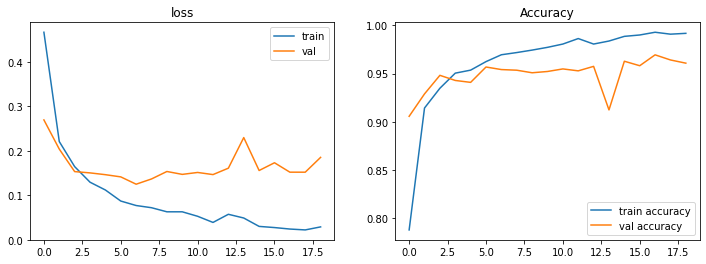

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)
plot_history(loaded_model_fit, title='', axs=None, exp_name="");

In [ ]:
y_pred = loaded_model.predict(x_cnn)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       339
           1       0.98      0.97      0.97       915

    accuracy                           0.96      1254
   macro avg       0.95      0.95      0.95      1254
weighted avg       0.96      0.96      0.96      1254

[[318  21]
 [ 28 887]]


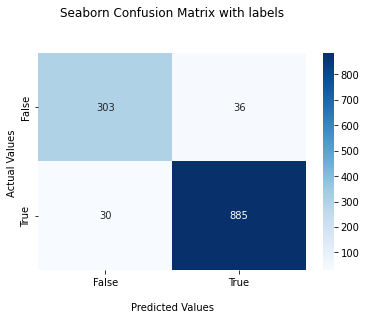

In [ ]:
def heatmap(x):
  ax = sns.heatmap(x, annot=True, fmt='', cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
heatmap(cf)

## **Result visualizing**

In [ ]:
predictions = model.predict(x_cnn)

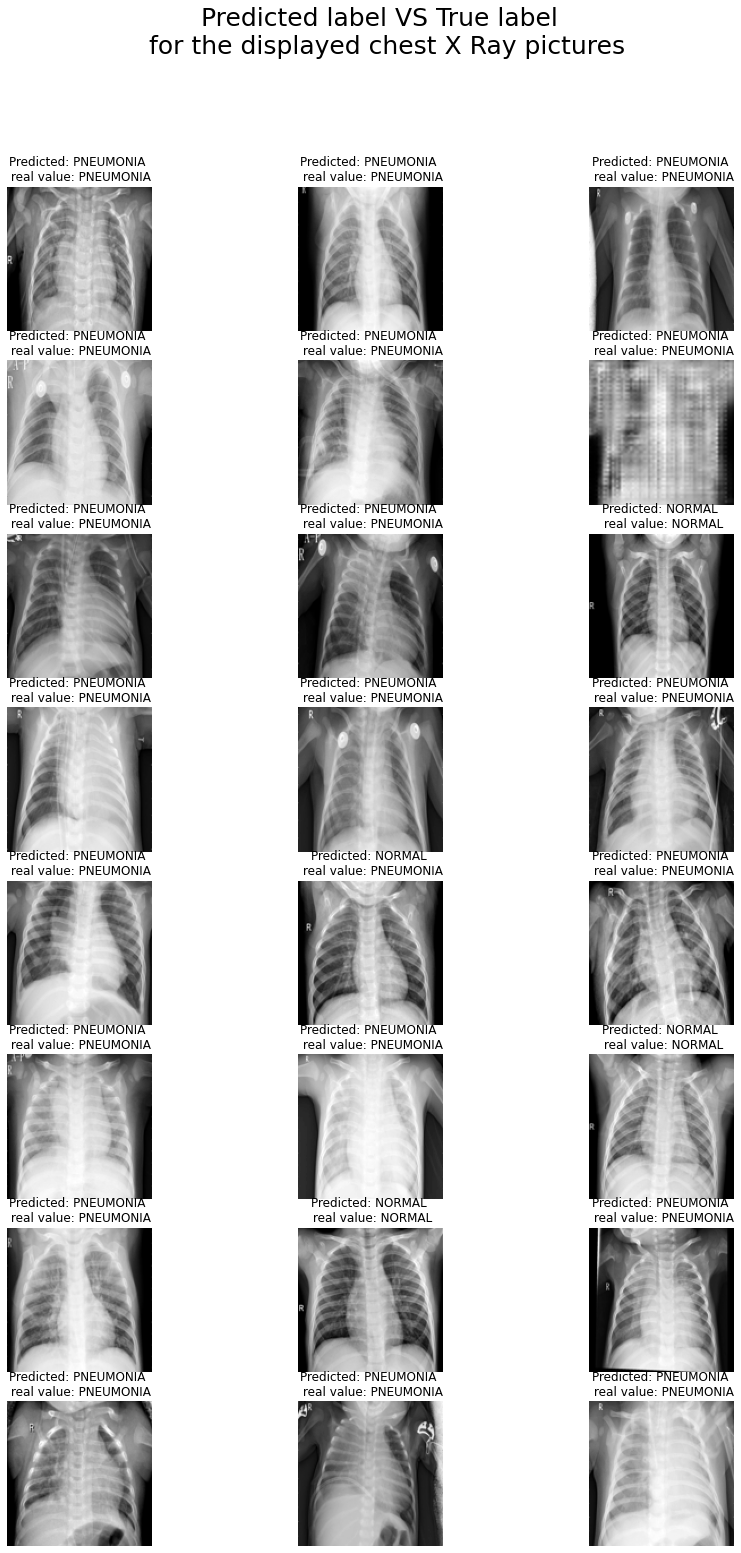

In [ ]:
fig = plt.figure(figsize=(20,25))
gs = fig.add_gridspec(8, 4)
#
for row in range(0, 8):
    for col in range(0, 3):
        num_image = random.randint(0, X_test_norm.shape[0])
        ax = fig.add_subplot(gs[row, col])
        ax.axis('off');
        ax.set_title("Predicted: " + categories[int(np.round(predictions)[num_image][0])] + " \n real value: " + categories[y_test_cat[num_image]])
        ax.imshow(X_test [num_image]);
fig.suptitle("Predicted label VS True label \n for the displayed chest X Ray pictures", fontsize=25, x=0.42);
#plt.tight_layout;

# **Transfer Learnings**

In [ ]:
print(X_train_tl.shape)
print(X_test_tl.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)

(5012, 128, 128, 3)
(1254, 128, 128, 3)
(5012,)
(1254,)


## **1. inception v3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_inception = InceptionV3(input_shape = (image_height, image_width, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#freezing layers
for layer in base_inception.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_inception.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

inception_model = tf.keras.models.Model(base_inception.input, x)

inception_model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
%%time
inception = inception_model.fit(X_train_tl, y_train_cat ,validation_split=0.4, steps_per_epoch = 100, epochs = 19)

Epoch 1/19
100/100 [==============================] - 12s 122ms/step - loss: 0.0284 - acc: 0.9929 - val_loss: 0.3662 - val_acc: 0.9466
Epoch 2/19
100/100 [==============================] - 12s 116ms/step - loss: 0.0475 - acc: 0.9923 - val_loss: 0.3715 - val_acc: 0.9451
Epoch 3/19
100/100 [==============================] - 12s 116ms/step - loss: 0.0280 - acc: 0.9926 - val_loss: 0.4369 - val_acc: 0.9476
Epoch 4/19
100/100 [==============================] - 12s 116ms/step - loss: 0.0207 - acc: 0.9942 - val_loss: 0.4103 - val_acc: 0.9426
Epoch 5/19
100/100 [==============================] - 12s 116ms/step - loss: 0.0265 - acc: 0.9945 - val_loss: 0.5729 - val_acc: 0.9332
Epoch 6/19
100/100 [==============================] - 12s 116ms/step - loss: 0.0425 - acc: 0.9913 - val_loss: 0.8746 - val_acc: 0.9277
Epoch 7/19
100/100 [==============================] - 12s 116ms/step - loss: 0.0233 - acc: 0.9955 - val_loss: 0.4700 - val_acc: 0.9441
Epoch 8/19
100/100 [==============================] - 1

In [ ]:
inception_model.evaluate(X_test_tl, y_test_cat)

40/40 [==============================] - 3s 73ms/step - loss: 0.5450 - acc: 0.9514


[0.5450073480606079, 0.9513556361198425]

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/inception_with_fake_data.sav'
pickle.dump(inception_model, open(filename, 'wb'))

filenamefit = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/inception_fit_with_fake_data.sav'
pickle.dump(inception, open(filenamefit, 'wb'))

filename1 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_tf_with_fake_data.sav'
pickle.dump(X_test_tl, open(filename1, 'wb'))



INFO:tensorflow:Assets written to: ram://a3d69b23-0d3f-44a3-87b7-eaff21c407f4/assets
INFO:tensorflow:Assets written to: ram://f15635f9-e1aa-43a9-bd8a-04921b6806c2/assets


In [ ]:
# loading the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
x_tf = pickle.load(open(filename1, 'rb'))

loaded_model.evaluate(x_tf, y, verbose=1)

40/40 [==============================] - 5s 75ms/step - loss: 0.5450 - acc: 0.9514


[0.5450073480606079, 0.9513556361198425]

In [ ]:
y_pred = inception_model.predict(X_test_tl)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       339
           1       0.97      0.97      0.97       915

    accuracy                           0.95      1254
   macro avg       0.94      0.94      0.94      1254
weighted avg       0.95      0.95      0.95      1254

[[310  29]
 [ 32 883]]


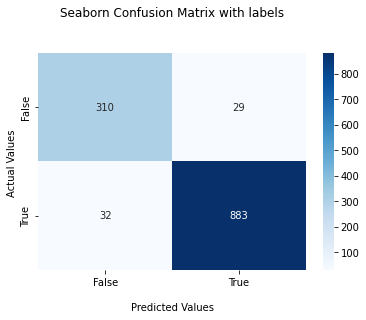

In [ ]:
heatmap(cf)

## **2. Resnet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
base_resnet = ResNet50(input_shape = (image_height, image_width, 3), include_top = False, weights = 'imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
#freezing the layers
for layer in base_resnet.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_resnet.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

resnet_model = tf.keras.models.Model(base_resnet.input, x)

resnet_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
%%time
resnet = resnet_model.fit(X_train_tl, y_train_cat ,validation_split=0.4, steps_per_epoch = 100, epochs = 19)

Epoch 1/19
100/100 [==============================] - 23s 166ms/step - loss: 0.5870 - acc: 0.7129 - val_loss: 0.5838 - val_acc: 0.7182
Epoch 2/19
100/100 [==============================] - 14s 140ms/step - loss: 0.5703 - acc: 0.7348 - val_loss: 0.5765 - val_acc: 0.7182
Epoch 3/19
100/100 [==============================] - 14s 140ms/step - loss: 0.5656 - acc: 0.7365 - val_loss: 0.5726 - val_acc: 0.7182
Epoch 4/19
100/100 [==============================] - 14s 140ms/step - loss: 0.5599 - acc: 0.7413 - val_loss: 0.5705 - val_acc: 0.7182
Epoch 5/19
100/100 [==============================] - 14s 140ms/step - loss: 0.5623 - acc: 0.7365 - val_loss: 0.5689 - val_acc: 0.7182
Epoch 6/19
100/100 [==============================] - 14s 140ms/step - loss: 0.5517 - acc: 0.7406 - val_loss: 0.5658 - val_acc: 0.7182
Epoch 7/19
100/100 [==============================] - 14s 140ms/step - loss: 0.5520 - acc: 0.7355 - val_loss: 0.5640 - val_acc: 0.7182
Epoch 8/19
100/100 [==============================] - 1

In [ ]:
resnet_model.evaluate(X_test_tl, y_test_cat)

40/40 [==============================] - 4s 98ms/step - loss: 0.5260 - acc: 0.7297


[0.5260228514671326, 0.7296651005744934]

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/resnet_fake.sav'
pickle.dump(resnet_model, open(filename, 'wb'))

filenamefit = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/resnet_fit_fake.sav'
pickle.dump(resnet, open(filenamefit, 'wb'))



INFO:tensorflow:Assets written to: ram://8e9019f8-5014-4d81-ac45-971df5083e22/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


INFO:tensorflow:Assets written to: ram://be92c2c8-f498-494b-9ce9-9793210838c5/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
#loading model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.evaluate(x_tf, y, verbose=1)

40/40 [==============================] - 5s 88ms/step - loss: 0.5260 - acc: 0.7297


[0.5260228514671326, 0.7296651005744934]

In [ ]:
y_pred = resnet_model.predict(X_test_tl)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       339
           1       0.73      1.00      0.84       915

    accuracy                           0.73      1254
   macro avg       0.36      0.50      0.42      1254
weighted avg       0.53      0.73      0.62      1254

[[  0 339]
 [  0 915]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


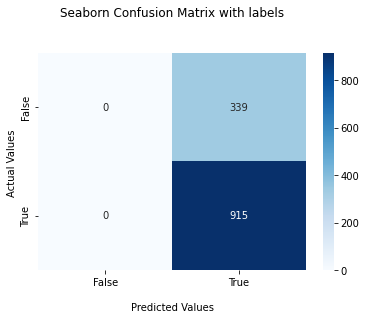

In [ ]:
heatmap(cf)

# **3. efficient net B0**


In [ ]:
base_efficient = tf.keras.applications.EfficientNetB0(input_shape = (image_height, image_width, 3), include_top = False, weights = 'imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
#freezing the layers
for layer in base_efficient.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_efficient.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

efficient_model = tf.keras.models.Model(base_efficient.input, x)

efficient_model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
%%time
efficient = efficient_model.fit(X_train_tl, y_train_cat ,validation_split=0.4, steps_per_epoch = 100, epochs = 19)

Epoch 1/19
100/100 [==============================] - 21s 119ms/step - loss: 0.6290 - acc: 0.7106 - val_loss: 0.5946 - val_acc: 0.7182
Epoch 2/19
100/100 [==============================] - 11s 111ms/step - loss: 0.5954 - acc: 0.7390 - val_loss: 0.6058 - val_acc: 0.7182
Epoch 3/19
100/100 [==============================] - 9s 90ms/step - loss: 0.5881 - acc: 0.7368 - val_loss: 0.5951 - val_acc: 0.7182
Epoch 4/19
100/100 [==============================] - 9s 90ms/step - loss: 0.5851 - acc: 0.7368 - val_loss: 0.5964 - val_acc: 0.7182
Epoch 5/19
100/100 [==============================] - 9s 90ms/step - loss: 0.5890 - acc: 0.7348 - val_loss: 0.6044 - val_acc: 0.7182
Epoch 6/19
100/100 [==============================] - 9s 90ms/step - loss: 0.5753 - acc: 0.7455 - val_loss: 0.6112 - val_acc: 0.7182
Epoch 7/19
100/100 [==============================] - 9s 90ms/step - loss: 0.5901 - acc: 0.7294 - val_loss: 0.6074 - val_acc: 0.7182
Epoch 8/19
100/100 [==============================] - 9s 90ms/ste

In [ ]:
efficient_model.evaluate(X_test_tl, y_test_cat)

40/40 [==============================] - 3s 64ms/step - loss: 0.5836 - acc: 0.7297


[0.5835651755332947, 0.7296651005744934]

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/efficient.sav'
pickle.dump(efficient_model, open(filename, 'wb'))

filenamefit = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/efficient_fit.sav'
pickle.dump(efficient, open(filenamefit, 'wb'))


INFO:tensorflow:Assets written to: ram://5f1c1a22-b172-4e8d-a78c-d0baa837dfe4/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


INFO:tensorflow:Assets written to: ram://70817745-1e32-4f64-a199-565a660952b6/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
#loading model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.evaluate(x_tf, y, verbose=1)

40/40 [==============================] - 4s 58ms/step - loss: 0.5836 - acc: 0.7297


[0.5835651755332947, 0.7296651005744934]

In [ ]:
y_pred = loaded_model.predict(X_test_tl)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
pd.DataFrame(y_pred)[0].unique()

array([1.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       339
           1       0.73      1.00      0.84       915

    accuracy                           0.73      1254
   macro avg       0.36      0.50      0.42      1254
weighted avg       0.53      0.73      0.62      1254

[[  0 339]
 [  0 915]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


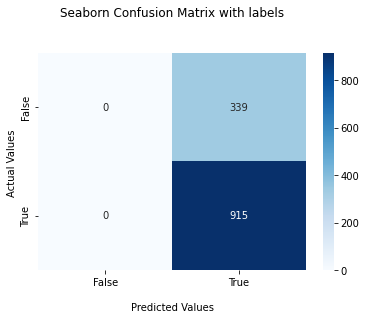

In [ ]:
heatmap(cf)

#**4. VGG 16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
base_vgg16 = VGG16(input_shape = (image_height, image_width, 3), include_top = False, weights = 'imagenet')

NameError: ignored

In [ ]:
#freezing the layers
for layer in base_vgg16.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_vgg16.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

vgg16_model = tf.keras.models.Model(base_vgg16.input, x)

vgg16_model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
%%time
vgg16 = vgg16_model.fit(X_train_tl, y_train_cat ,validation_split=0.4, steps_per_epoch = 100, epochs = 19)

Epoch 1/19
100/100 [==============================] - 26s 218ms/step - loss: 0.2236 - acc: 0.9074 - val_loss: 0.1566 - val_acc: 0.9471
Epoch 2/19
100/100 [==============================] - 14s 142ms/step - loss: 0.1234 - acc: 0.9513 - val_loss: 0.1335 - val_acc: 0.9471
Epoch 3/19
100/100 [==============================] - 14s 142ms/step - loss: 0.1007 - acc: 0.9677 - val_loss: 0.1139 - val_acc: 0.9601
Epoch 4/19
100/100 [==============================] - 14s 142ms/step - loss: 0.0870 - acc: 0.9716 - val_loss: 0.1120 - val_acc: 0.9626
Epoch 5/19
100/100 [==============================] - 19s 192ms/step - loss: 0.0686 - acc: 0.9761 - val_loss: 0.2079 - val_acc: 0.9227
Epoch 6/19
100/100 [==============================] - 14s 142ms/step - loss: 0.0660 - acc: 0.9745 - val_loss: 0.1215 - val_acc: 0.9566
Epoch 7/19
100/100 [==============================] - 19s 192ms/step - loss: 0.0528 - acc: 0.9784 - val_loss: 0.1095 - val_acc: 0.9646
Epoch 8/19
100/100 [==============================] - 1

In [ ]:
vgg16_model.evaluate(X_test_tl, y_test_cat)

40/40 [==============================] - 5s 120ms/step - loss: 0.1343 - acc: 0.9601


[0.13429057598114014, 0.960127592086792]

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/vgg16_with_fake_data.sav'
#pickle.dump(vgg16_model, open(filename, 'wb'))

In [ ]:
#loading model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.evaluate(x_tf, y, verbose=1)

40/40 [==============================] - 4s 87ms/step - loss: 0.1547 - acc: 0.9841


[0.15474383533000946, 0.9840510487556458]

In [ ]:
y_pred = loaded_model.predict(X_test_tl)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       339
           1       0.99      0.99      0.99       915

    accuracy                           0.98      1254
   macro avg       0.98      0.98      0.98      1254
weighted avg       0.98      0.98      0.98      1254

[[328  11]
 [  9 906]]


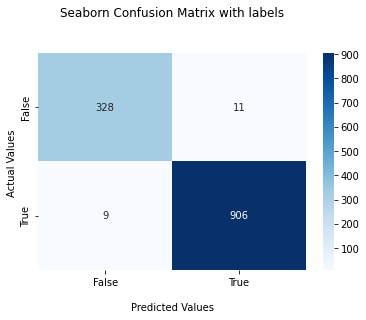

In [ ]:
heatmap(cf)

#**5. densenet 201**

In [ ]:
base_densenet = tf.keras.applications.densenet.DenseNet201(input_shape = (image_height, image_width, 3), include_top = False, weights = 'imagenet')

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
#freezing the layers
for layer in base_densenet.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_densenet.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

densenet_model = tf.keras.models.Model(base_densenet.input, x)

densenet_model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
%%time
densenet = densenet_model.fit(X_train_tl, y_train_cat ,validation_split=0.4, steps_per_epoch = 100, epochs = 19)

Epoch 1/19
100/100 [==============================] - 51s 335ms/step - loss: 0.3356 - acc: 0.8916 - val_loss: 0.1267 - val_acc: 0.9596
Epoch 2/19
100/100 [==============================] - 25s 249ms/step - loss: 0.1061 - acc: 0.9603 - val_loss: 0.1433 - val_acc: 0.9476
Epoch 3/19
100/100 [==============================] - 25s 247ms/step - loss: 0.0900 - acc: 0.9671 - val_loss: 0.3824 - val_acc: 0.8608
Epoch 4/19
100/100 [==============================] - 25s 248ms/step - loss: 0.0708 - acc: 0.9732 - val_loss: 0.1682 - val_acc: 0.9431
Epoch 5/19
100/100 [==============================] - 25s 247ms/step - loss: 0.0433 - acc: 0.9865 - val_loss: 0.1035 - val_acc: 0.9636
Epoch 6/19
100/100 [==============================] - 26s 260ms/step - loss: 0.0301 - acc: 0.9913 - val_loss: 0.1442 - val_acc: 0.9576
Epoch 7/19
100/100 [==============================] - 25s 247ms/step - loss: 0.0304 - acc: 0.9894 - val_loss: 0.1530 - val_acc: 0.9556
Epoch 8/19
100/100 [==============================] - 2

In [ ]:
densenet_model.evaluate(X_test_tl, y_test_cat)

40/40 [==============================] - 8s 195ms/step - loss: 0.1888 - acc: 0.9665


[0.18883538246154785, 0.9665071964263916]

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/densenet_with_fake_data.sav'
pickle.dump(densenet_model, open(filename, 'wb'))

filenamefit = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/densenet_fit_with_fake_data.sav'
pickle.dump(densenet, open(filenamefit, 'wb'))

INFO:tensorflow:Assets written to: ram://6757af5c-c152-4663-9081-c1ac2c70db8e/assets
INFO:tensorflow:Assets written to: ram://47e25757-2a76-4117-b5ce-83390b94ae03/assets


In [ ]:
#loading model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.evaluate(x_tf, y, verbose=1)

KeyboardInterrupt: ignored

In [ ]:
y_pred = densenet_model.predict(X_test_tl)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       339
           1       0.97      0.99      0.98       915

    accuracy                           0.97      1254
   macro avg       0.97      0.95      0.96      1254
weighted avg       0.97      0.97      0.97      1254

[[309  30]
 [ 12 903]]


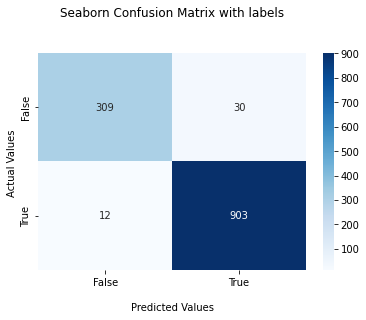

In [ ]:
heatmap(cf)

# **6. Xception**

In [ ]:
base_xception = tf.keras.applications.xception.Xception(input_shape = (image_height, image_width, 3), include_top = False, weights = 'imagenet')

In [ ]:
#freezing the layers
for layer in base_xception.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_xception.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

xception_model = tf.keras.models.Model(base_xception.input, x)

xception_model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
%%time
xception = xception_model.fit(X_train_tl, y_train_cat ,validation_split=0.4, steps_per_epoch = 100, epochs = 19)

Epoch 1/19
100/100 [==============================] - 53s 216ms/step - loss: 0.2883 - acc: 0.8894 - val_loss: 0.1803 - val_acc: 0.9362
Epoch 2/19
100/100 [==============================] - 18s 185ms/step - loss: 0.1637 - acc: 0.9371 - val_loss: 0.2365 - val_acc: 0.9207
Epoch 3/19
100/100 [==============================] - 18s 185ms/step - loss: 0.1479 - acc: 0.9423 - val_loss: 0.1529 - val_acc: 0.9456
Epoch 4/19
100/100 [==============================] - 18s 185ms/step - loss: 0.1091 - acc: 0.9574 - val_loss: 0.1557 - val_acc: 0.9461
Epoch 5/19
100/100 [==============================] - 22s 223ms/step - loss: 0.0832 - acc: 0.9690 - val_loss: 0.2460 - val_acc: 0.9202
Epoch 6/19
100/100 [==============================] - 18s 185ms/step - loss: 0.0884 - acc: 0.9690 - val_loss: 0.1646 - val_acc: 0.9426
Epoch 7/19
100/100 [==============================] - 18s 185ms/step - loss: 0.0646 - acc: 0.9781 - val_loss: 0.2126 - val_acc: 0.9406
Epoch 8/19
100/100 [==============================] - 1

In [ ]:
xception_model.evaluate(X_test_tl, y_test_cat)

In [ ]:
import pickle
# saving the model 
filename = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/xception_with_fake_data.sav'
pickle.dump(xception_model, open(filename, 'wb'))

filename1 = '/content/drive/MyDrive/Colab Notebooks/datasets/Chest X-Ray Images (Pneumonia)/save1/X_xception_fit_with_fake_data.sav'
pickle.dump(xception, open(filename1, 'wb'))



INFO:tensorflow:Assets written to: ram://6f19741c-41de-43ff-9443-122ffccd31d5/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


INFO:tensorflow:Assets written to: ram://ce39c713-0e28-4eff-bf08-51dd6d577a99/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
#loading model
loaded_model = pickle.load(open(filename, 'rb'))


loaded_model.evaluate(X_test_tl, y_test_cat, verbose=1)

40/40 [==============================] - 5s 110ms/step - loss: 0.2667 - acc: 0.9474


[0.26672109961509705, 0.9473684430122375]

In [ ]:
y_pred = xception_model.predict(X_test_tl)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, y_pred))
cf = confusion_matrix(y_test_cat, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       339
           1       0.96      0.97      0.96       915

    accuracy                           0.95      1254
   macro avg       0.94      0.93      0.93      1254
weighted avg       0.95      0.95      0.95      1254

[[303  36]
 [ 30 885]]


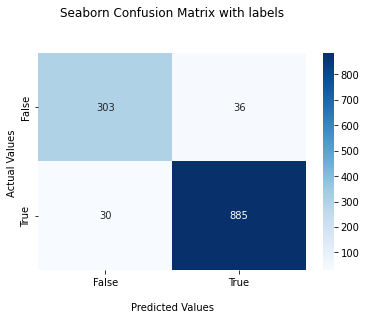

In [ ]:
heatmap(cf)